In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
# Import Data
train_data = pd.read_csv("data/train.csv")
train_data.ffill(inplace=True)

test_data = pd.read_csv("data/test.csv")
ytest = pd.read_csv("data/sample_submission_jn0a7vR.csv")

In [3]:
print(train_data.describe())
# print(len(train_data))
# train_data['row_id']

             row_id        energy
count  94992.000000  94992.000000
mean   47496.500000   1703.149845
std    27421.972723    369.301283
min        1.000000    866.388600
25%    23748.750000   1431.662400
50%    47496.500000   1654.646150
75%    71244.250000   1936.203000
max    94992.000000   3374.399600


In [5]:
# train_data.groupby('datetime').mean()
# print(len(train_data))

<AxesSubplot: xlabel='datetime'>

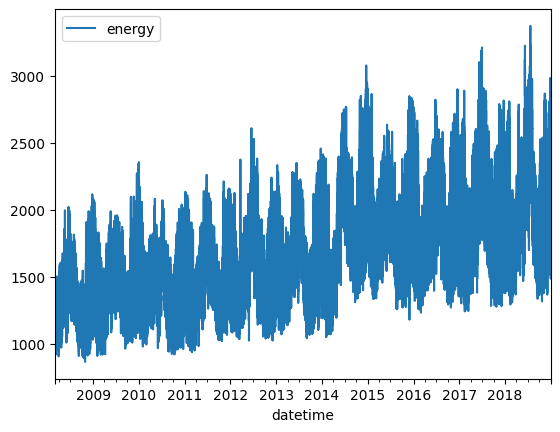

In [16]:
# col = 'datetime'
# train_data['row_id'].astype('int64')
# d = train_data[col]
# d = d.apply(str.split)
# d = d.apply(lambda x: x[0].split('-')+x[1].split(':'))
# d = d.apply(lambda x: datetime.datetime(*list(map(int, x))))
# d
# train_data[col] = d
# a = train_data[['energy']]
# a.index = d
# a.plot()

In [5]:
def split_col(data, col, delim, cols, obj):
    d = data[col]
    d = d.apply(str.split, args=(delim,))
    for i in range(len(cols)):
        data[cols[i]] = d.apply(lambda x: obj(x[i]))
#     print(data)

split_col(train_data, 'datetime', ' ', ['date','time'], str)
split_col(train_data, 'date', '-', ['year', 'month', 'day'], int)
split_col(train_data, 'time', ':', ['hour','minutes','seconds'], int)
train_data['date'] = train_data['date'].apply(lambda x: datetime.date(*list(map(int, x.split('-')))))
train_data['time'] = train_data['time'].apply(lambda x: datetime.time(*list(map(int, x.split(':')))))

split_col(test_data, 'datetime', ' ', ['date','time'], str)
split_col(test_data, 'date', '-', ['year', 'month', 'day'], int)
split_col(test_data, 'time', ':', ['hour','minutes','seconds'], int)
test_data['date'] = test_data['date'].apply(lambda x: datetime.date(*list(map(int, x.split('-')))))
test_data['time'] = test_data['time'].apply(lambda x: datetime.time(*list(map(int, x.split(':')))))

print(train_data.head())
print(test_data.head())

   row_id             datetime       energy        date      time  year  \
0       1  2008-03-01 00:00:00  1259.985563  2008-03-01  00:00:00  2008   
1       2  2008-03-01 01:00:00  1095.541500  2008-03-01  01:00:00  2008   
2       3  2008-03-01 02:00:00  1056.247500  2008-03-01  02:00:00  2008   
3       4  2008-03-01 03:00:00  1034.742000  2008-03-01  03:00:00  2008   
4       5  2008-03-01 04:00:00  1026.334500  2008-03-01  04:00:00  2008   

   month  day  hour  minutes  seconds  
0      3    1     0        0        0  
1      3    1     1        0        0  
2      3    1     2        0        0  
3      3    1     3        0        0  
4      3    1     4        0        0  
   row_id             datetime        date      time  year  month  day  hour  \
0   94993  2019-01-01 00:00:00  2019-01-01  00:00:00  2019      1    1     0   
1   94994  2019-01-01 01:00:00  2019-01-01  01:00:00  2019      1    1     1   
2   94995  2019-01-01 02:00:00  2019-01-01  02:00:00  2019      1    

In [43]:
# le_date = LabelEncoder()
# le_date.fit(train_data['date'])
# le_date.transform(train_data['date'])
# train_data['date'] = pd.DataFrame(le_date.transform(train_data['date']))

# le_time = LabelEncoder()
# le_time.fit(train_data['time'])
# le_time.transform(train_data['time'])
# train_data['time'] = pd.DataFrame(le_time.transform(train_data['time']))

# train_data

In [5]:
# ohe = OneHotEncoder()
# cols = ['date','time']
# ohe.fit(train_data[cols])
# # print(ohe.get_feature_names_out())
# dat = ohe.transform(train_data[cols]).toarray()
# print(len(ohe.get_feature_names_out()))
# print(len(dat))
# dat


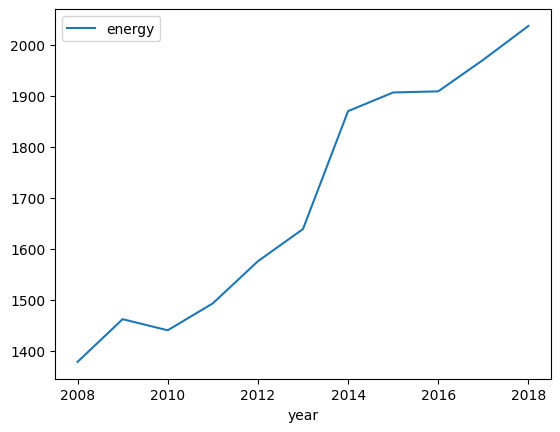

In [6]:

def plot(data, col1, col2):
    col1_vs_col2 = data[[col1,col2]]
    col1_vs_col2 = col1_vs_col2.groupby(col1).mean()
    col1_vs_col2.plot()
    plt.show()
    
plot(train_data, 'year', 'energy')

In [28]:
# train_data.index = train_data['row_id']
# train_data
# sns.heatmap(train_data.drop(['row_id','datetime', 'date','time'],axis=1))
pd.DataFrame()

""


In [19]:
def RMSE(ypred, ytest):
    rmse = math.sqrt(mean_squared_error(ypred,ytest))
#     print("Root Mean Squared Error: ", rmse)
    return rmse

def get_random_state(data: pd.DataFrame, algo: object, test_size: float, rng: tuple, drop_columns: list, target: str, test_data: pd.DataFrame=None) -> int:
    rmse = []
    rs = []
    d = [600,600]
    for state in range(*rng):
        alg = algo()
        x = data.drop(drop_columns,axis=1)
        y = data[target]
        if test_data == None:
            xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=test_size,random_state=state)
        else:
            xtrain = data.drop(drop_columns,axis=1)
            ytrain = data[target]
            xtest = test_data.drop(drop_columns[:-1], axis=1);
            ytest = test_data[target]
            
        alg.fit(xtrain,ytrain)
        ypred = alg.predict(xtest)
        rmse.append(RMSE(ypred, ytest))
        rs.append(state)
        if rmse[-1] < d[0]:
            d[0] = rmse[-1]
            d[1] = state
    print(d)
    plt.plot(rs, rmse)
    plt.show()
    return d[1]
        
drop_columns = ['row_id', 'energy', 'datetime', 'date', 'time']
target = 'energy'

[263.153351147256, 35]


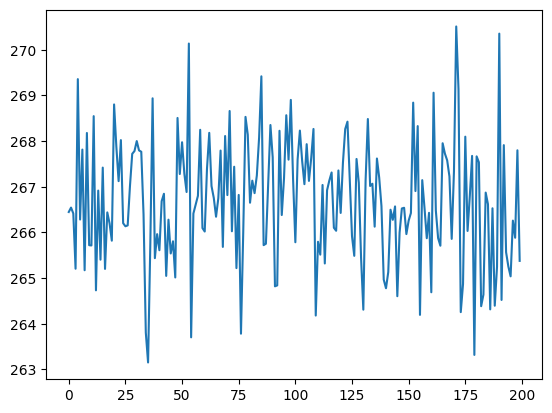

35


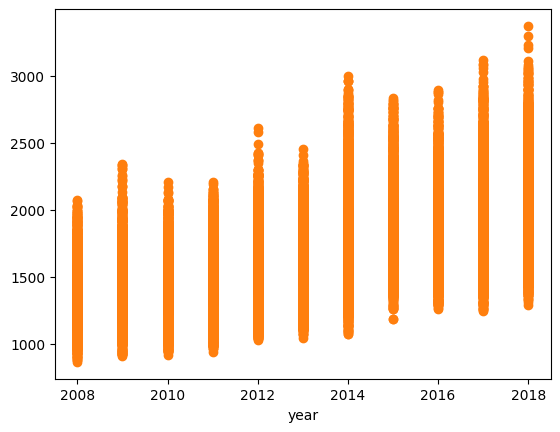

In [9]:

def LinearReg():
    state = get_random_state(train_data, LinearRegression, 0.2,(0,200),drop_columns, target)
    print(state)

    lr = LinearRegression()
    x = train_data.drop(['row_id','energy','datetime','date','time'],axis=1)
    y = train_data['energy']
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=state)
    lr.fit(xtrain,ytrain)
    ypred = lr.predict(xtest)
    
    X = "year"
    plt.scatter(xtest.year, ypred)
    plt.scatter(xtest.year, ytest)
    plt.xlabel(X)
    plt.show()

LinearReg()

[85.46299301224133, 175]


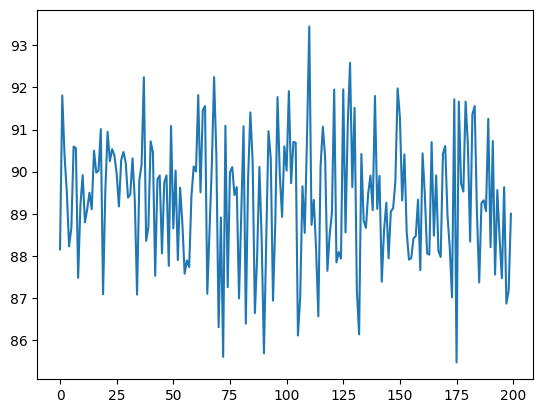

175


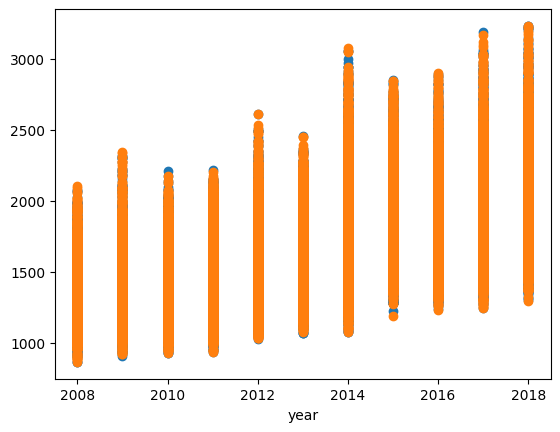

In [10]:
def DTR():
    state = get_random_state(train_data, DecisionTreeRegressor, 0.3,(0,200),drop_columns, target)
    print(state)
    
    dtr = DecisionTreeRegressor()
    x = train_data.drop(drop_columns,axis=1)
    y = train_data[target]
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=state)
    dtr.fit(xtrain,ytrain)
    ypred = dtr.predict(xtest)
    
    X = "year"
    plt.scatter(xtest[X], ypred)
    plt.scatter(xtest[X], ytest)
    plt.xlabel(X)
    plt.show()

DTR()

In [13]:
# split any column
# col -> column to split
# delim -> delimeter to use to split (For example: '22-03-09' -> ['22', '03', '09'] with delimeter as '-')
# cols -> expected column names of parts of split column
# obj -> obj to map the data of the part to ( For example: '22' -> 22 when obj is int)
def split_col(data, col, delim, cols, obj):
    d = data[col]
    d = d.apply(str.split, args=(delim,))
    for i in range(len(cols)):
        data[cols[i]] = d.apply(lambda x: obj(x[i]))

# Plot line graph for two columns
def plot(data, col1, col2):
    col1_vs_col2 = data[[col1,col2]]
    col1_vs_col2 = col1_vs_col2.groupby(col1).mean()
    col1_vs_col2.plot()
    plt.show()

# return the Room Mean Squared Score
def RMSE(ypred, ytest):
    rmse = math.sqrt(mean_squared_error(ypred,ytest))
#     print("Root Mean Squared Error: ", rmse)
    return rmse

# split the datetime column into day/month/year and hour/minute/second
def clean_data(data):
    split_col(data, 'datetime', ' ', ['date','time'], str)
    split_col(data, 'date', '-', ['year', 'month', 'day'], int)
    split_col(data, 'time', ':', ['hour','minutes','seconds'], int)
    data['date'] = data['date'].apply(lambda x: datetime.date(*list(map(int, x.split('-')))))
    data['time'] = data['time'].apply(lambda x: datetime.time(*list(map(int, x.split(':')))))
    
# make the submission file for Job-A-Thon
def save_data(row_id, ypred):
    data = pd.DataFrame({'row_id':row_id, 'energy':ypred})
    data.to_csv('data/submission.csv')

def submit():
    train_data = pd.read_csv("data/train.csv")
    test_data = pd.read_csv("data/test.csv")
    ytest = pd.read_csv("data/sample_submission_jn0a7vR.csv")
    test_data['energy'] = ytest['energy']
    print("Data Imported")
    
    print("Cleaning Data")
    train_data.ffill(inplace=True)
    clean_data(train_data)
    clean_data(test_data)
    print("Data has been cleaned")
            
    drop_columns = ['row_id', 'datetime', 'date', 'time', 'energy']
    target = 'energy'
    
    # Using Decision Tree Regressor
    print("Building model")
    dtr = DecisionTreeRegressor()
    xtrain = train_data.drop(drop_columns,axis=1)
    ytrain = train_data[target]    
    xtest = test_data.drop(drop_columns, axis=1)
    ytest = ytest['energy']
    
    dtr.fit(xtrain,ytrain)
    print("Data fit into model")
    
    ypred = dtr.predict(xtest)
    
    print("Root Mean Squared Error: ", RMSE(ypred, ytest))
    
    save_data(test_data['row_id'], ypred)

submit()

Data Imported
Cleaning Data
Data has been cleaned
Building model
Data fit into model
Root Mean Squared Error:  485.4327620463997


In [30]:
train_data.empty

False